In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Carregar imagem
img = cv2.imread('tumor_218.jpg')  
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
# 2. Suavização para redução de ruído
blur = cv2.GaussianBlur(gray, (5, 5), 0)

In [4]:
# 3. Binarização com limiar adaptativo (ou Otsu)
_, thresh = cv2.threshold(blur, 190, 255, cv2.THRESH_BINARY)

In [5]:

# 4. Operações morfológicas (fechamento -> abertura)
kernel = np.ones((5, 5), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

In [6]:
# 5. Aplicar máscara para isolar o tumor da imagem original
masked = cv2.bitwise_and(gray, gray, mask=closing)

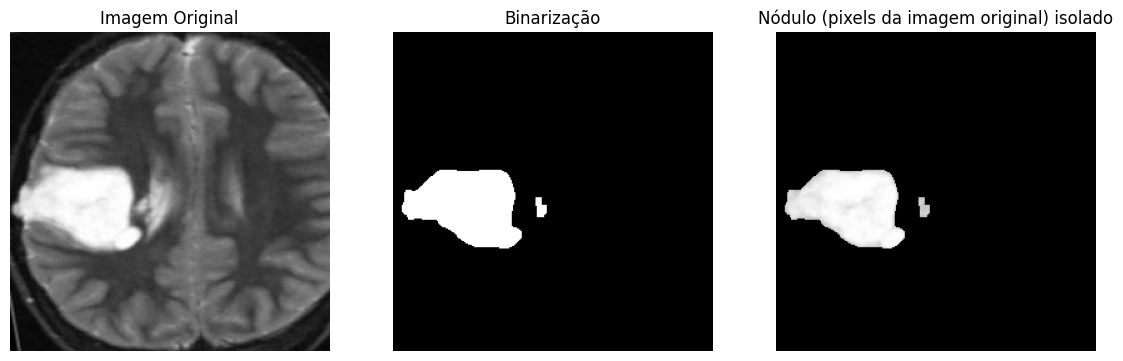

In [7]:
# 6. Exibir resultado como no modelo (imagem original, binarizada, tumor isolado)
plt.figure(figsize=(14, 8))

# Imagem original
plt.subplot(1, 3, 1)
plt.title("Imagem Original")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")

# Região saudável
plt.subplot(1, 3, 2)
plt.title("Binarização")
plt.imshow(opening, cmap='gray')
plt.axis("off")

# Região danificada
plt.subplot(1, 3, 3)
plt.title("Nódulo (pixels da imagem original) isolado")
plt.imshow(masked, cmap='gray')
plt.axis("off")

plt.show()